In [3]:
# 1.데이터를 로드하고 확인 (feature, target)
# 2.기술통계량적 확인 작업
# 3.PCA함수를 활용해 PC score를 얻음
# 4.PC score를 통한 회귀분석 & confusion matrix를 통한 분류 성능 확인

In [1]:
# 실습 데이터셋 라이브러리. 
# iris - 꽃잎 데이터, 꽃 받침/길이 등을 기반으로 꽃의 종류를 예측(분류 데이터셋)
from sklearn import datasets

# PCA를 위한 라이브러리
from sklearn.decomposition import PCA

# 자료처리/시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning 무시
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [9]:
X = iris.data[:,[0,2]]
y = iris.target
## X feature 변수 파악
print(X.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
print(feature_names)
df_X = pd.DataFrame(X, columns=feature_names)
df_X.head()

(150, 2)
['sepal length (cm)', 'petal length (cm)']


,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [4]:
## Y target 변수 파악
print(y.shape)
df_Y = pd.DataFrame(y, columns=['target'])
df_Y.head()

(150,)


,target
0,0
1,0
2,0
3,0
4,0


In [5]:
df_Y.target.unique()

array([0, 1, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# 결측치 확인
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

sepal length    0
petal length    0
dtype: int64
target    0
dtype: int64


In [8]:
df_Y.value_counts()

target
0         50
1         50
2         50
dtype: int64

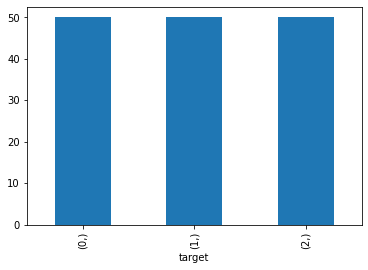

In [9]:
df_Y.value_counts().plot(kind='bar')
plt.show()

In [11]:
df_X.shape[1]

2

C:\Users\SEC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


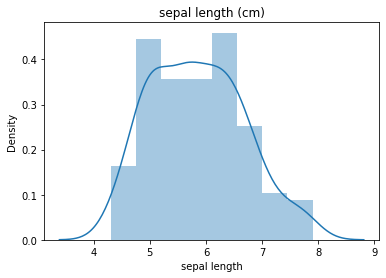

C:\Users\SEC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


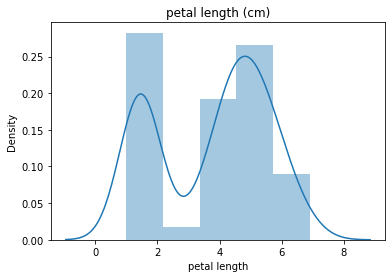

In [11]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X.iloc[:,i])
    plt.title(feature_names[i])
    plt.show()

In [12]:
# PCA 함수를 활용하여 PC Score 얻기
pca = PCA(n_components=2) # feature 변수개수가 2개 (4개의 변수 중 2개만 사용하므로)
pca.fit(X)

PCA(n_components=2)

In [13]:
pca.components_ # 고유벡터 출력

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [14]:
pca.explained_variance_   #고유값 출력. 첫 번째 열 sepal length가 숫자가 더 크므로 모델을 설명하는데 많은 의미를 가진다는 의미.

array([3.66189877, 0.1400726 ])

In [15]:
PCscore = pca.transform(X)
PCscore[0:5] # X의 자료에 eigen vector(고유벡터)를 곱한 값, 새로운 공간에서 좌표값으로 나타남

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [16]:
# 고유벡터에 전치행렬을 구함
eigen_value=pca.components_.transpose() 
print(eigen_value)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


첫 열이 더 큰수인 것을 보아 첫번째 열이 분산 설명력이 더 높다

In [17]:
mX=np.matrix(X) # 계산을 용이하게 하기위해 X를 행렬로 만듬
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])  # 데이터의 평균과 데이터의 값이 얼마나 떨어져있는지(차이가 있는지) 확인
dfmX=pd.DataFrame(mX)
dfmX.head()

,0,1
0,-0.743333,-2.358
1,-0.943333,-2.358
2,-1.143333,-2.458
3,-1.243333,-2.258
4,-0.843333,-2.358


In [18]:
# PC Score를 구하기 (예로 5개 값만)
PCScore = (mX*eigen_value)
print(PCScore[0:5])

[[-2.46024094 -0.24479165]
 [-2.53896211 -0.06093579]
 [-2.70961121  0.08355948]
 [-2.56511594  0.25420858]
 [-2.49960153 -0.15286372]]


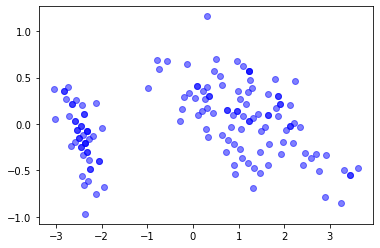

In [19]:
# PC Score의 산점도
plt.plot(PCScore[:,0], PCScore[:,1], 'o', color='blue', alpha=0.5)

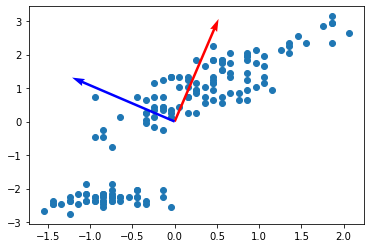

In [20]:
# 본 데이터의 산점도
plt.scatter(dfmX[0],dfmX[1])
origin=[0,0], [0,0] # origin point
plt.quiver(*origin, eigen_value[0,:], eigen_value[1,:], color=["r","b"], scale=3)

X,Y 관점에서 모두 널리 퍼져있는 형태이고, X가 커질수록 Y가 증가하기 때문에 Correlation이 높다고 볼 수 있다.   
그러므로 X와 Y가 비슷한 변수이다.   
빨간색 선(PC1,0번째 고유벡터)이 넓게 점을 포함하므로 데이터를 더 잘 설명한다고 할 수 있다.  
PC를 뽑았을 때, 축 하나가 큰 역할을 차지하여 2개의 변수를 1개의 PCscore 사용으로 차원을 축소시킬 수 있다는 뜻이다.

In [21]:
# 4가지 변수를 모두 사용
X2=iris.data
pca2=PCA(n_components=4)
pca2.fit(X2)         

PCA(n_components=4)

In [22]:
# PC 고유값 확인, 1번째 변수가 가장 영향이 크고, 2번째 변수가 그 다음으로 영향이 크다.
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [23]:
PCs=pca2.transform(X2)[:,0:2]
PCs

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
clf=LogisticRegression(solver="sag", multi_class="multinomial").fit(X2,y)

C:\Users\SEC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [26]:
confusion_matrix(y,clf.predict(X2))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]], dtype=int64)

"the coef_ did not converge"를 확인할 수 있다.   
즉 beta 값이 수렴하지 않아 해를 찾지 못한다는 뜻이다.   
이는 모델을 단순화할 필요성이 생기고 PCA를 통해 X의 변수를 줄일 수 있는 지 알아볼 필요가 있다.    
그리고 우리는 위에서 두 개의 PCscore만 사용하는 것이 충분하다는 것을 확인했다.   
그렇기에 2개의 PCscore를 사용한 Logistic fitting을 진행하겠다.  

In [32]:
# 차원축소 : 변수 2개 선택
clf2=LogisticRegression(solver="sag", multi_class="multinomial").fit(PCs,y)
clf2.predict(PCs)
confusion_matrix(y,clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [30]:
# X의 변수만 2개로 줄이기 (multiple logistic regression)
clf=LogisticRegression(solver="sag", max_iter=1000, #max_iter 해를 찾을때까지 얼마나 기다려 줄 수있는지 
                       random_state=0, #random_state 값 고정
                       multi_class="multinomial").fit(X2[:,0:2],y)
confusion_matrix(y,clf.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [31]:
# 차원축소 : 변수 4개 선택 : 가장 성능이 좋음
PCs1=pca2.transform(X2)
clf3=LogisticRegression(solver="sag", multi_class="multinomial").fit(PCs1,y)
confusion_matrix(y,clf3.predict(PCs1))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)